In [1]:
import pandas as pd

In [2]:
kcat=df = pd.read_csv('/content/drive/MyDrive/kcatdata/kcat_bert_data.csv')

In [3]:
kcat.head()

,Value,wildtype,Abies grandis,Acanthamoeba polyphaga mimivirus,Acetoanaerobium sticklandii,Acetobacter aceti,Acetobacter xylinus,Acholeplasma laidlawii,Achromobacter lyticus,Achromobacter xylosoxidans,...,Feature_1014,Feature_1015,Feature_1016,Feature_1017,Feature_1018,Feature_1019,Feature_1020,Feature_1021,Feature_1022,Feature_1023
0,20.1000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
1,6.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
2,19.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
3,0.0075,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
4,0.0390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875


In [4]:
kcat.dropna(inplace=True)

In [7]:
kcat.isnull().sum(),len(kcat),kcat.shape

(Value                               0
 wildtype                            0
 Abies grandis                       0
 Acanthamoeba polyphaga mimivirus    0
 Acetoanaerobium sticklandii         0
                                    ..
 Feature_1019                        0
 Feature_1020                        0
 Feature_1021                        0
 Feature_1022                        0
 Feature_1023                        0
 Length: 1879, dtype: int64,
 16830,
 (16830, 1879))

In [8]:
target=kcat['Value']
kcat.drop('Value',axis=1,inplace=True)
kcat.head()

,wildtype,Abies grandis,Acanthamoeba polyphaga mimivirus,Acetoanaerobium sticklandii,Acetobacter aceti,Acetobacter xylinus,Acholeplasma laidlawii,Achromobacter lyticus,Achromobacter xylosoxidans,Acidianus ambivalens,...,Feature_1014,Feature_1015,Feature_1016,Feature_1017,Feature_1018,Feature_1019,Feature_1020,Feature_1021,Feature_1022,Feature_1023
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875


In [9]:
target.isnull().sum()

0

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(kcat,target,test_size=0.2,random_state=101)

In [12]:
xtest.shape,ytest.shape,(xtrain.shape,ytrain.shape)

((3366, 1878), (3366,), ((13464, 1878), (13464,)))

In [13]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
ytrain.shape

(13464,)

In [15]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(xtrain,ytrain.values.ravel())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [16]:
preds=xgb_model.predict(xtest)
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(ytest,preds))
print(mean_absolute_error(ytest,preds))

1064274.43690299
246.80045432125624


In [17]:
from sklearn.metrics import r2_score
print(r2_score(ytest,preds))


0.2041588698307818


In [18]:
import numpy as np
print(np.sqrt(mean_squared_error(ytest,preds)))

1031.6367756642792


In [20]:
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=0.1)
ridge_model.fit(xtrain,ytrain.values.ravel())

Ridge(alpha=0.1)

In [23]:
ridge_preds=ridge_model.predict(xtest)
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(ytest,ridge_preds))
print(mean_absolute_error(ytest,ridge_preds))

1304962.0195978978
298.51641250885393


In [24]:
import numpy as np
print(r2_score(ytest,ridge_preds))
print(np.sqrt(mean_squared_error(ytest,ridge_preds)))

0.024177963414373727
1142.349342188237


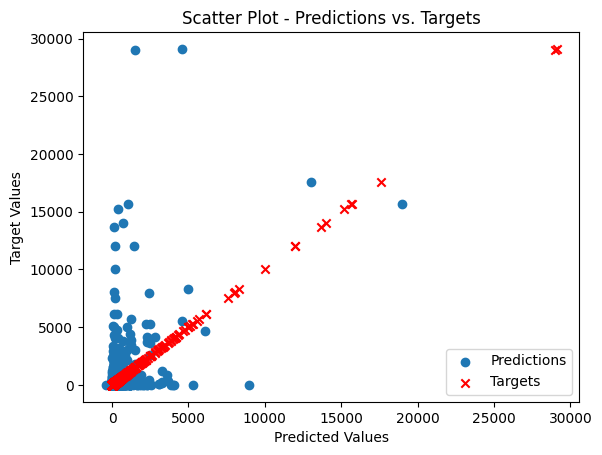

In [19]:

import matplotlib.pyplot as plt

plt.scatter(preds, ytest, marker='o', label='Predictions')  # Predictions with circles
plt.scatter(ytest, ytest, marker='x', color='red', label='Targets')  # Targets with crosses
plt.xlabel('Predicted Values')
plt.ylabel('Target Values')
plt.title('Scatter Plot - Predictions vs. Targets')
plt.legend()
plt.show()

In [ ]:
print(preds[:10]),preds.shape

[  216.39363   216.39363   216.39363   216.39363   216.39363 20516.482
   216.39363   216.39363   216.39363   216.39363]


(None, (3402,))

In [ ]:
preds=pd.DataFrame(preds)

In [ ]:
from joblib import dump
dump(xgb_model,'/content/drive/MyDrive/kcatdata/model.h5')

['/content/drive/MyDrive/kcatdata/model.h5']

In [25]:
from sklearn.linear_model import HuberRegressor, RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [26]:
models = [

    GradientBoostingRegressor(),
    Lasso(alpha=0.5),
    #Ridge(alpha=0.1),
    #RANSACRegressor(),
    #RandomForestRegressor(random_state=42),

    SVR(),
    #HuberRegressor(epsilon=1.35, max_iter=1000)
]

In [30]:
from tqdm import tqdm

In [31]:
results = []
for model in tqdm(models):
    model.fit(xtrain, ytrain.values.ravel())
    ypred = model.predict(xtest)
    r_sq = mean_absolute_error(ytest,ypred)
    results.append((model.__class__.__name__,r_sq))
    div = ['-']*80
    print(''.join(div))
    print(f'Evaluation of {model.__class__.__name__} is done!')

 33%|███▎      | 1/3 [00:21<00:43, 21.88s/it]

--------------------------------------------------------------------------------
Evaluation of GradientBoostingRegressor is done!


 67%|██████▋   | 2/3 [00:25<00:11, 11.00s/it]

--------------------------------------------------------------------------------
Evaluation of Lasso is done!


100%|██████████| 3/3 [07:07<00:00, 142.57s/it]

--------------------------------------------------------------------------------
Evaluation of SVR is done!


In [ ]:
results

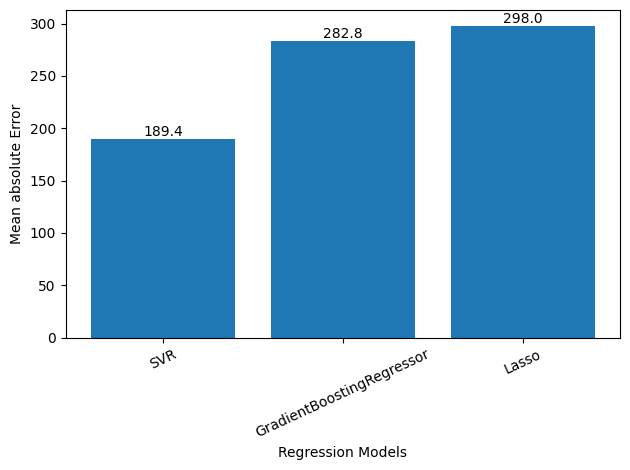

In [33]:
sorted_results_r2 = sorted(results, key=lambda x: x[1])

# Select the top 5 models with the lowest mean squared error
top_5_models = sorted_results_r2[:]


import matplotlib.pyplot as plt

model_names = [model_name for model_name,_ in top_5_models]
r2_values = [r_score for _, r_score in top_5_models]

plt.bar(model_names, r2_values)
plt.xlabel('Regression Models')
plt.ylabel('Mean absolute Error')

plt.xticks(rotation=25)
for i, v in enumerate(r2_values):
    plt.annotate(str(v)[0:5], (i, v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV

In [37]:
params={'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],'gamma':['auto','scale'],
        'epsilon': [0.1, 0.2, 0.3,0.4,0.5],'C':[0.1, 1,0.01,0.5, 10,100]}

In [35]:
svr_model=SVR()

In [38]:
gridsearch=GridSearchCV(svr_model,param_grid=params,verbose=2,scoring='neg_mean_absolute_error')

In [ ]:
gridsearch.fit(xtrain,ytrain.values.ravel())

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END ......C=0.1, epsilon=0.1, gamma=auto, kernel=linear; total time= 5.3min
[CV] END ......C=0.1, epsilon=0.1, gamma=auto, kernel=linear; total time= 5.6min
[CV] END ......C=0.1, epsilon=0.1, gamma=auto, kernel=linear; total time= 5.0min
[CV] END ......C=0.1, epsilon=0.1, gamma=auto, kernel=linear; total time= 5.3min
[CV] END ......C=0.1, epsilon=0.1, gamma=auto, kernel=linear; total time= 5.5min


In [ ]:
print("Best Parameters:", gridsearch.best_params_)
print("Best Score:", gridsearch.best_score_)
print(gridsearch.best_estimator_)